# Bike Sharing - Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import shapiro, f_oneway
from statsmodels.stats.multicomp import MultiComparison

## 1) Exploratory Data Analysis

We begin by loading the data into a pandas data frame.

In [2]:
df = pd.read_csv('bike_sharing_day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


To begin our analysis, we use the describe command.

In [3]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


We can see that there are no missing values in the data frame and that there are no unexpected negative values. We can also see that the average number of bikes rented a day in this period was 4504.348837.

Next, we can calculate the correlation between these atributes.

In [4]:
df.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


We can now visualize this in a heat map.

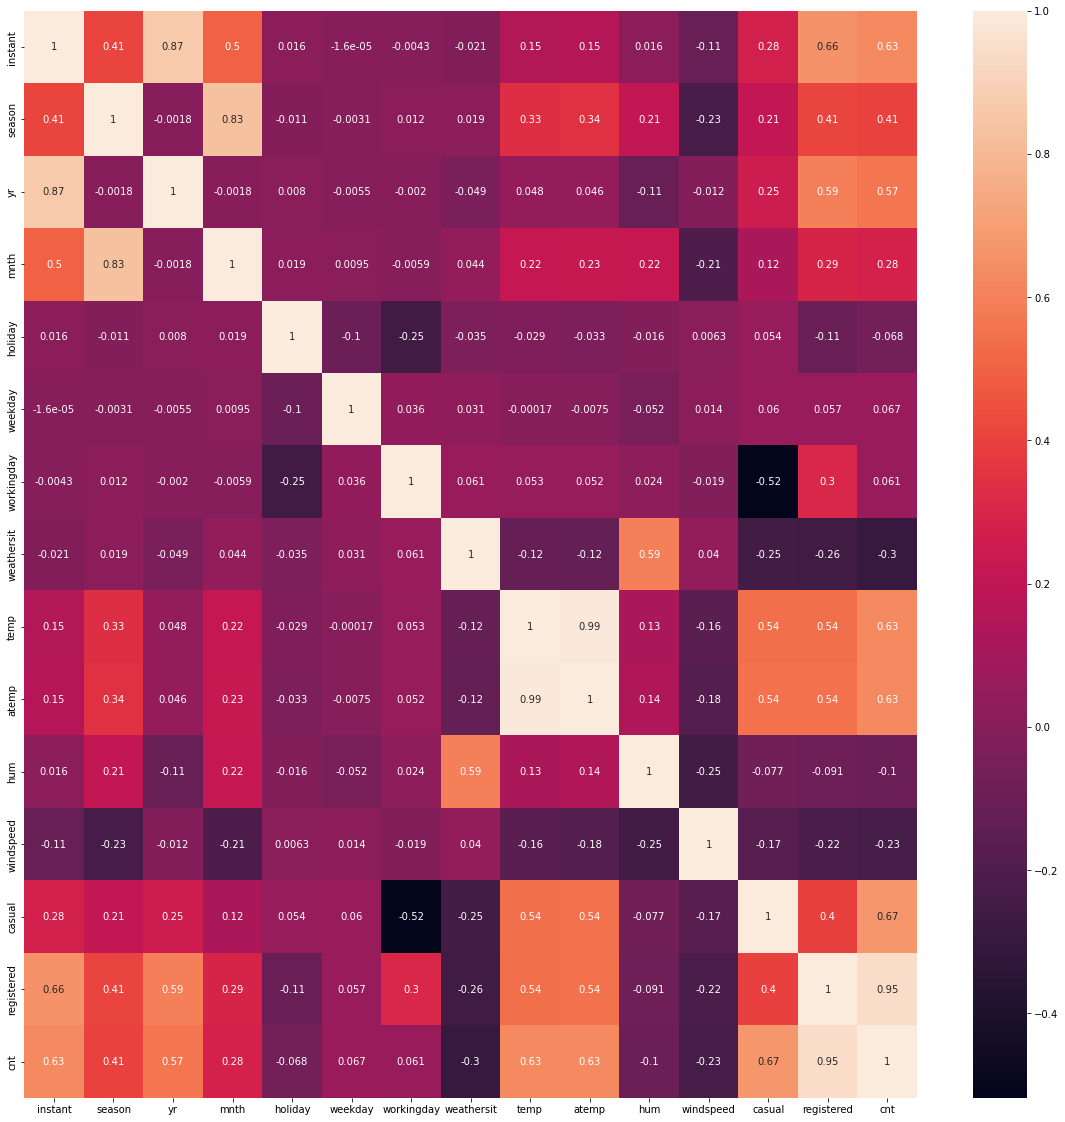

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True);

We can see that attributes such as temperature and feeling temperature have a high correlation with the number of bikes rented in a given day.

Next, we can graph the number of bikes rented per day.

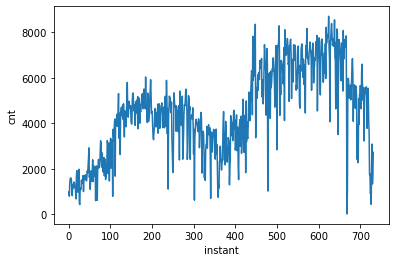

In [9]:
plt.plot(df['instant'], df['cnt'])
plt.xlabel('instant')
plt.ylabel('cnt')
plt.show()

We can see that there were more rentals in 2012 than in 2011 and that most of them happened in the middle of the year, not at the beginning or the end.

Since temperature had one of the highest correlations with the number of rentals, we can also make a scatter plot to verify the relationship between these two attributes.

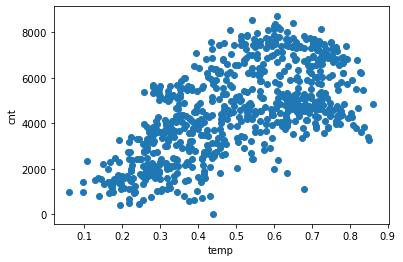

In [10]:
plt.scatter(df['temp'], df['cnt'])
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

As expected, we can see that there are more rentals the higher the temperature is.

Our next step is to create pivot tables relating the discreet variables with the number of rentals. Let us begin by counting how many rentals there were per year.

In [12]:
pd.pivot_table(df, index = 'yr', values = 'cnt', aggfunc=np.sum)

,cnt
yr,
0,1243103
1,2049576


As expected, there were significantly more rentals on the second year than in the first.

We may now repeat this process for the seasons and the months.

In [13]:
pd.pivot_table(df, index = 'season', values = 'cnt', aggfunc=np.sum)

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [14]:
pd.pivot_table(df, index = 'mnth', values = 'cnt', aggfunc=np.sum)

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


It's easy to see that, as expected, there are more rentals towards the middle of the year.

Let us also do the same for the days of the week, but calculating the mean.

In [3]:
pd.pivot_table(df, index = 'weekday', values = 'cnt', aggfunc=np.mean)

,cnt
weekday,
0,4228.828571
1,4338.123810
2,4510.663462
3,4548.538462
4,4667.259615
5,4690.288462
6,4550.542857


We can see that the number of rentals increases as the week progresses, reaching a maximum on Friday.

Finally, let us make a pivot table for the weather using the mean.

In [5]:
pd.pivot_table(df, index = 'weathersit', values = 'cnt', aggfunc=np.mean)

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


As could be expected, the clearer the weather, the more rentals there are.

## 2) Preprocessing

Now we will prepare our data for the machine learning algorithms. Our first step is to separate the predicting attributes from the one we want to predict.

In [6]:
X_df = df.drop(columns = 'cnt')
y_df = df['cnt']
X_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'],
      dtype='object')

Next, we must choose which attributes we will use for the predictions, or rather, which ones we won't. The attributes "instant" and "dteday" are there for indexing purposes and never repeat themselves, therefore we will not use them. The attributes "temp" and "atemp" are highly correlated with each other, so we need pick only one of the two for the predictions, we choose "temp". Finally, we are not interested in whether the clients were "casual" or "registered", so we drop these two columns.

In [7]:
X_df = X_df.drop(columns = ['instant', 'dteday', 'atemp', 'casual', 'registered'])
X_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed'],
      dtype='object')

The last step of the preprocessing is to use the standard scaler, which is necessary for the regression algorithms of SVR and neural networks.

In [8]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_df = scaler_X.fit_transform(X_df)
y_df = scaler_y.fit_transform(y_df.values.reshape(-1,1))
X_df

array([[-1.34821315, -1.00136893, -1.60016072, ..., -0.82666213,
         1.25017133, -0.38789169],
       [-1.34821315, -1.00136893, -1.60016072, ..., -0.72109471,
         0.47911298,  0.74960172],
       [-1.34821315, -1.00136893, -1.60016072, ..., -1.63465665,
        -1.33927398,  0.74663186],
       ...,
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.32322427,
         0.87839173, -0.85355213],
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.30955752,
        -1.01566357,  2.06944426],
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.52822548,
        -0.35406086, -0.46020122]])

Finally, we save the preprocessed variables using pickle.

In [9]:
with open('bike_sharing.pkl', mode='wb') as f:
    pickle.dump([X_df, y_df], f)

## 3) Linear Regression

Now we can begin making predictions on the data base, starting with the linear regression algorithm.

Our first step is to load the preprocessed data.

In [2]:
with open('bike_sharing.pkl', mode='rb') as f:
    X_df, y_df = pickle.load(f)

Next, we use cross validation to evaluate this algorithm for different train-test splits. We calculate both the r2 score and the mean absolute error of the prediction. However, we need to keep in mind that, since we used the standard scaler on the data, the mean absolute error we obtain is not the one we would have for the original data, however, since we are only interested in comparing the results for different algorithms, this value is still useful for us.

In [29]:
results_linear_r2 = []
linear = LinearRegression()
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(linear, X_df, y_df, cv=kfold)
    results_linear_r2.append(scores.mean())
results_linear_r2

[0.7887860257313168,
 0.786873176350368,
 0.779987879178415,
 0.787546367928318,
 0.7907973006951963,
 0.7841412613894462,
 0.7878020257187426,
 0.7852749504364296,
 0.7873638656047981,
 0.7845446864000702,
 0.786651146201005,
 0.7869258281934342,
 0.7880955927602634,
 0.7838263338611374,
 0.7931361150262699,
 0.7869187709947656,
 0.787305101307115,
 0.7832316169256268,
 0.7833808872002975,
 0.7888637565000808,
 0.7874994117027556,
 0.7864595804498856,
 0.7873860544383191,
 0.7849220942155488,
 0.7851548308203954,
 0.7846715400766613,
 0.7886887380272977,
 0.7834970757509592,
 0.7854485723946067,
 0.7869728965003794]

In [13]:
results_linear_mae = []
linear = LinearRegression()
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(linear, X_df, y_df, cv=kfold, scoring='neg_mean_absolute_error')
    results_linear_mae.append(scores.mean())
results_linear_mae

[-0.3415625969973991,
 -0.34049646833121144,
 -0.34109516063152456,
 -0.3407426479547646,
 -0.34025472979243687,
 -0.33991107329545905,
 -0.3415644339611118,
 -0.34099451070391573,
 -0.3402665740072421,
 -0.3407923761888882,
 -0.3409866607369395,
 -0.3409631221781809,
 -0.3396394336788381,
 -0.34126050422820553,
 -0.3402724197562836,
 -0.3426375452698552,
 -0.3419276234351403,
 -0.3409160102153265,
 -0.3402555265992039,
 -0.34119879586101626,
 -0.34075208309112204,
 -0.34134032288466115,
 -0.34081622140602463,
 -0.34020501692028315,
 -0.339738281793884,
 -0.3419687821936018,
 -0.34040296297135225,
 -0.34297514734064566,
 -0.34081026093021033,
 -0.34217476563102023]

## 4) Polynomial Regression

We will now test the polynomial linear regression algorithm, which is the same as the usual linear regression one, but altering the predicting attributes with the "PolynomialFeatures" class.

We begin by importing the data.

In [2]:
with open('bike_sharing.pkl', mode='rb') as f:
    X_df, y_df = pickle.load(f)

We will consider polynomial orders 2, 3 and 4, and compare them to determine which one gives the best result.

In [3]:
poly2 = PolynomialFeatures(degree=2)
poly3 = PolynomialFeatures(degree=3)
poly4 = PolynomialFeatures(degree=4)
X_df_poly2 = poly2.fit_transform(X_df)
X_df_poly3 = poly3.fit_transform(X_df)
X_df_poly4 = poly4.fit_transform(X_df)

We first calculate, using cross validation, the score and mean absolute error for order 2.

In [20]:
results_linear_poly2_r2 = []
linear_poly = LinearRegression()
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(linear_poly, X_df_poly2, y_df, cv=kfold)
    results_linear_poly2_r2.append(scores.mean())
print(np.array(results_linear_poly2_r2).mean())
results_linear_poly2_mae = []
linear_poly = LinearRegression()
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(linear_poly, X_df_poly2, y_df, cv=kfold, scoring='neg_mean_absolute_error')
    results_linear_poly2_mae.append(scores.mean())
print(np.array(results_linear_poly2_mae).mean())

0.8373969958980294
-0.2808903026296622


Now we do the same for order 3.

In [18]:
results_linear_poly3_r2 = []
linear_poly = LinearRegression()
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(linear_poly, X_df_poly3, y_df, cv=kfold)
    results_linear_poly3_r2.append(scores.mean())
print(np.array(results_linear_poly3_r2).mean())
results_linear_poly3_mae = []
linear_poly = LinearRegression()
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(linear_poly, X_df_poly3, y_df, cv=kfold, scoring='neg_mean_absolute_error')
    results_linear_poly3_mae.append(scores.mean())
print(np.array(results_linear_poly3_mae).mean())

-8.156482051231093e+22
-20209218346.698997


And for order 4.

In [19]:
results_linear_poly4_r2 = []
linear_poly = LinearRegression()
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(linear_poly, X_df_poly4, y_df, cv=kfold)
    results_linear_poly4_r2.append(scores.mean())
print(np.array(results_linear_poly4_r2).mean())
results_linear_poly4_mae = []
linear_poly = LinearRegression()
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(linear_poly, X_df_poly4, y_df, cv=kfold, scoring='neg_mean_absolute_error')
    results_linear_poly4_mae.append(scores.mean())
print(np.array(results_linear_poly4_mae).mean())

-4.496082548727605e+18
-135581426.59991658


We only obtain good results for degree 2, while degrees 3 and 4 have seemingly suffered from overfitting.

In [21]:
results_linear_poly2_r2

[0.8416430951822678,
 0.8448912831122998,
 0.8451924029370719,
 0.841122800946076,
 0.8468669782274783,
 0.8439590114207729,
 0.8497132198783273,
 0.7862522739995611,
 0.8407497070934629,
 0.8457301268425432,
 0.8347503894539997,
 0.8473906446926129,
 0.7965643938315285,
 0.8394078802336262,
 0.8439890779151558,
 0.8435910286150021,
 0.8492353942658413,
 0.8450925123946517,
 0.8464733106967876,
 0.8430333258069682,
 0.8416535116633757,
 0.846560681906508,
 0.8466896230403688,
 0.849421334683177,
 0.8510228775950756,
 0.7244719834483011,
 0.8523777626956377,
 0.8495746299324974,
 0.8464886871279054,
 0.8379999273020058]

In [22]:
results_linear_poly2_mae

[-0.28129954604891994,
 -0.2811432296967792,
 -0.2771449018123463,
 -0.27898464306440884,
 -0.27967020182845487,
 -0.2788676235172582,
 -0.27773819747647066,
 -0.28844283188444764,
 -0.28199802632637483,
 -0.2808157231939086,
 -0.28351873408679396,
 -0.2786751141825364,
 -0.2861903299752315,
 -0.2811195533846943,
 -0.2823171301917167,
 -0.2832742247046941,
 -0.27992314504627214,
 -0.2783911529612098,
 -0.27868344714931564,
 -0.2821559928835865,
 -0.28169685408556827,
 -0.28082229594905683,
 -0.2770392713643929,
 -0.27542121104198214,
 -0.27504569265503104,
 -0.2969035789707132,
 -0.2761338694834524,
 -0.2797164265705685,
 -0.2788711665899622,
 -0.28470496276371804]

## 5) Decision Tree Regression

Next, we will evaluate the decision tree regressor.

We import the preprocessed data.

In [23]:
with open('bike_sharing.pkl', mode='rb') as f:
    X_df, y_df = pickle.load(f)

Since the decision tree regressor has many parameters that may affect the results, we use a grid search to find the ones that give us the best r2 score.

In [28]:
parameters = {'criterion': ['squared_error', 'absolute_error'],
             'splitter': ['best', 'random'],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 5, 10]}
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=parameters)
grid_search.fit(X_df, y_df)
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'absolute_error',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'best'}

Now we use these parameters to calculate de r2 score and mean absolute error with cross validation.

In [30]:
results_tree_r2 = []
tree = DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=5, min_samples_split=2, splitter='best')
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(tree, X_df, y_df, cv=kfold)
    results_tree_r2.append(scores.mean())
results_tree_r2

[0.8115563477327704,
 0.7997884454714861,
 0.8094307464383373,
 0.7990245683684922,
 0.7999955607917214,
 0.8087717368443975,
 0.8064222795593498,
 0.7821187900833506,
 0.8071532802579309,
 0.8103176809570989,
 0.8006028714928078,
 0.7916659839129893,
 0.8023334704963047,
 0.7972425311084159,
 0.8160636470510877,
 0.7935616445583071,
 0.8132545950621293,
 0.8066621494272125,
 0.8013182451189003,
 0.8187724737878476,
 0.7979856280954072,
 0.7915668859255666,
 0.8079194838710022,
 0.7964071756068717,
 0.7978144256524432,
 0.8056778843762373,
 0.7986825831439152,
 0.7943778212093298,
 0.790880199175237,
 0.8093981426207535]

In [31]:
results_tree_mae = []
tree = DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=5, min_samples_split=2, splitter='best')
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(tree, X_df, y_df, cv=kfold, scoring='neg_mean_absolute_error')
    results_tree_mae.append(scores.mean())
results_tree_mae

[-0.30935543492044365,
 -0.31169675310420686,
 -0.30253355720292563,
 -0.31094890386833035,
 -0.3097231702928759,
 -0.2977753302819409,
 -0.30877941673458265,
 -0.31965857557360533,
 -0.3012374350045733,
 -0.3023192644384722,
 -0.3120285674248911,
 -0.31369369201001246,
 -0.30986441131373077,
 -0.31314934440138786,
 -0.30473780834136627,
 -0.3148149566674993,
 -0.30647316377024175,
 -0.3006904720871098,
 -0.31219403949729113,
 -0.2969211379031155,
 -0.31463956363378204,
 -0.3159906646919838,
 -0.31021875936486726,
 -0.3137842046455294,
 -0.30873249895462773,
 -0.3075157492279998,
 -0.31353511440807963,
 -0.3198739249802039,
 -0.31494641060024997,
 -0.3047250043247842]

## 6) Random Forest Regression 

The next algorithm we are going to test is the random forest regressor.

Let us first load the data.

In [32]:
with open('bike_sharing.pkl', mode='rb') as f:
    X_df, y_df = pickle.load(f)

We then tune the parameters.

In [37]:
parameters = {'criterion': ['squared_error', 'absolute_error'],
             'n_estimators': [10, 40, 100, 150],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 5, 10]}
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters)
grid_search.fit(X_df, y_df.ravel())
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'absolute_error',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

And then we use cross validation to calculate the r2 score and the mean absolute error.

In [39]:
results_forest_r2 = []
forest = RandomForestRegressor(criterion='absolute_error', min_samples_leaf=1, min_samples_split=2, n_estimators=150)
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(forest, X_df, y_df.ravel(), cv=kfold)
    results_forest_r2.append(scores.mean())
results_forest_r2

[0.8820946822286541,
 0.878528009840112,
 0.8762082049664139,
 0.8807425650546072,
 0.8816660952401365,
 0.8752482161797881,
 0.8796499064267325,
 0.8722633148019592,
 0.8814557444293932,
 0.8825914201392525,
 0.8758967899805231,
 0.8746503721720773,
 0.8756056647997399,
 0.8769962429524222,
 0.8830443574122221,
 0.8803085514536267,
 0.8786314983504708,
 0.8762888188698493,
 0.8752287472769723,
 0.8804576068942396,
 0.8815753964539781,
 0.8797987561298661,
 0.8843963986977469,
 0.8769306089720346,
 0.8824944088030435,
 0.8688803519851914,
 0.8875235120021298,
 0.881219059969364,
 0.8748676414256733,
 0.8783698226764818]

In [40]:
results_forest_mae = []
forest = RandomForestRegressor(criterion='absolute_error', min_samples_leaf=1, min_samples_split=2, n_estimators=150)
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(forest, X_df, y_df.ravel(), cv=kfold, scoring='neg_mean_absolute_error')
    results_forest_mae.append(scores.mean())
results_forest_mae

[-0.23711135616124546,
 -0.23395099942939618,
 -0.23717372906176845,
 -0.2347303067028464,
 -0.23423608444448457,
 -0.2346596906229847,
 -0.23589051335675518,
 -0.23998747873789833,
 -0.23374562724273895,
 -0.23370347687914478,
 -0.23636686883236657,
 -0.2389917958559232,
 -0.23810516459511724,
 -0.23530003415455597,
 -0.23744389754097434,
 -0.23442719836897222,
 -0.23672547344605815,
 -0.23624623395894476,
 -0.2345081036252359,
 -0.230621509607142,
 -0.23478283450353937,
 -0.23443147281316362,
 -0.23355199503561735,
 -0.23454981928338287,
 -0.23320799834817785,
 -0.2438185052683753,
 -0.23295441497508093,
 -0.23648386630684323,
 -0.2344598436388227,
 -0.23505451476193984]

## 7) Support Vector Regression

Next, we are going to study the support vector regression algorithm.

We first load the data.

In [41]:
with open('bike_sharing.pkl', mode='rb') as f:
    X_df, y_df = pickle.load(f)

The next step is to tune the parameters.

In [43]:
parameters = {'tol': [0.001, 0.0001, 0.00001],
             'C': [1.0, 1.5, 2.0],
             'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
grid_search = GridSearchCV(estimator=SVR(), param_grid=parameters)
grid_search.fit(X_df, y_df.ravel())
best_parameters = grid_search.best_params_
best_parameters

{'C': 2.0, 'kernel': 'rbf', 'tol': 0.001}

We then use these parameters to calculate the r2 score and the mean absolute error.

In [44]:
results_svm_r2 = []
svm = SVR(C=2.0, kernel='rbf', tol=0.001)
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(svm, X_df, y_df.ravel(), cv=kfold)
    results_svm_r2.append(scores.mean())
results_svm_r2

[0.8983594281724591,
 0.8980679002491543,
 0.8906160284513442,
 0.8930937873147989,
 0.8981905625209008,
 0.8945055532909094,
 0.8948135699869274,
 0.8923281037463168,
 0.8909095265499959,
 0.8980339976998097,
 0.8929069702449921,
 0.8962139709411614,
 0.8930065462847827,
 0.8873063133286963,
 0.8955191099829335,
 0.889450475194991,
 0.8959635812981774,
 0.8879243748970715,
 0.8963121114264876,
 0.8932192702028896,
 0.8954904103098835,
 0.8909079144070919,
 0.8911598654730832,
 0.89413059928051,
 0.8947874618885562,
 0.8921012560796644,
 0.9003330566073178,
 0.8956762575374135,
 0.8929720896238817,
 0.894738487798552]

In [45]:
results_svm_mae = []
svm = SVR(C=2.0, kernel='rbf', tol=0.001)
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(svm, X_df, y_df.ravel(), cv=kfold, scoring='neg_mean_absolute_error')
    results_svm_mae.append(scores.mean())
results_svm_mae

[-0.2210267667381775,
 -0.2191739370047782,
 -0.22322171913586902,
 -0.22705498095393822,
 -0.22267664415168348,
 -0.2222627844216049,
 -0.22411310036809523,
 -0.22568635875122198,
 -0.22525533304083295,
 -0.21948254053573782,
 -0.2236748251700987,
 -0.22067687861615942,
 -0.2224411545198539,
 -0.22785058996994892,
 -0.22420439575002415,
 -0.2288395992519575,
 -0.22155786036973266,
 -0.225466783662787,
 -0.22173079236599985,
 -0.22341287038608065,
 -0.2242977941986815,
 -0.22448765729992046,
 -0.2252864305504166,
 -0.22193042362998444,
 -0.2239910164438789,
 -0.22455764079934543,
 -0.2192436031051832,
 -0.223807660343321,
 -0.22436476898165653,
 -0.22390212236005755]

## 8) Neural Network

The last algorithm we will test is the neural network regressor.

We load the data.

In [2]:
with open('bike_sharing.pkl', mode='rb') as f:
    X_df, y_df = pickle.load(f)

We now tune the parameters.

In [7]:
parameters = {'activation': ['relu', 'logistic', 'tanh'],
             'solver': ['adam', 'sgd'],
             'batch_size': [10, 56],
             'hidden_layer_sizes': [[6, 6]],
             'max_iter': [1000]}
grid_search = GridSearchCV(estimator=MLPRegressor(), param_grid=parameters)
grid_search.fit(X_df, y_df.ravel())
best_parameters = grid_search.best_params_
best_parameters

{'activation': 'logistic',
 'batch_size': 10,
 'hidden_layer_sizes': [6, 6],
 'max_iter': 1000,
 'solver': 'adam'}

Then we use these parameters to calculate the r2 score and the mean absolute error.

In [9]:
results_neural_r2 = []
neural = MLPRegressor(activation='logistic', batch_size=10, solver='adam', hidden_layer_sizes=[6, 6], max_iter=1000)
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(neural, X_df, y_df.ravel(), cv=kfold)
    results_neural_r2.append(scores.mean())
results_neural_r2

[0.863209963785569,
 0.8630897838179532,
 0.8699223856477936,
 0.8623804257010734,
 0.8657814522813189,
 0.8670301000188294,
 0.8796898829589852,
 0.8675729024467269,
 0.8689160246317196,
 0.871227739504236,
 0.8649703942731642,
 0.8683190818886617,
 0.8696887621763333,
 0.8780005655349747,
 0.8721092834469231,
 0.8684552715215055,
 0.8680712005009544,
 0.8615704295745511,
 0.8617086905282237,
 0.8649906268680161,
 0.8646008493867006,
 0.8737954218545078,
 0.8744674496985911,
 0.8614934555738116,
 0.8672986461833713,
 0.8685587824735176,
 0.8713936890692423,
 0.8703251546181093,
 0.8542079038374375,
 0.8693059683421677]

In [10]:
results_neural_mae = []
neural = MLPRegressor(activation='logistic', batch_size=10, solver='adam', hidden_layer_sizes=[6, 6], max_iter=1000)
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    scores = cross_val_score(neural, X_df, y_df.ravel(), cv=kfold, scoring='neg_mean_absolute_error')
    results_neural_mae.append(scores.mean())
results_neural_mae

[-0.2592840821563883,
 -0.2608850153076657,
 -0.2651230158257752,
 -0.2565385387354854,
 -0.24944257594428182,
 -0.2466618495317197,
 -0.2528734327777086,
 -0.26345027123441533,
 -0.25918862871972653,
 -0.2615009427042164,
 -0.25942633904376133,
 -0.25989732034507107,
 -0.26212570009535663,
 -0.265350022474169,
 -0.2572009637190221,
 -0.26156013162605735,
 -0.2524990938281052,
 -0.2636239807485411,
 -0.26411463875915075,
 -0.26219463914565544,
 -0.2457149749761593,
 -0.2526389407776619,
 -0.26494329716325365,
 -0.2645055498424798,
 -0.26518897424736165,
 -0.2656510333380064,
 -0.26064581413306165,
 -0.26496861812003525,
 -0.25849305288251595,
 -0.257284407949227]

## 9) Comparing the Algorithms

Now that we have the results for different regressors, let us compare them.

In [2]:
results_linear_r2 = [0.7887860257313168,
 0.786873176350368,
 0.779987879178415,
 0.787546367928318,
 0.7907973006951963,
 0.7841412613894462,
 0.7878020257187426,
 0.7852749504364296,
 0.7873638656047981,
 0.7845446864000702,
 0.786651146201005,
 0.7869258281934342,
 0.7880955927602634,
 0.7838263338611374,
 0.7931361150262699,
 0.7869187709947656,
 0.787305101307115,
 0.7832316169256268,
 0.7833808872002975,
 0.7888637565000808,
 0.7874994117027556,
 0.7864595804498856,
 0.7873860544383191,
 0.7849220942155488,
 0.7851548308203954,
 0.7846715400766613,
 0.7886887380272977,
 0.7834970757509592,
 0.7854485723946067,
 0.7869728965003794]
results_linear_mae = [-0.3415625969973991,
 -0.34049646833121144,
 -0.34109516063152456,
 -0.3407426479547646,
 -0.34025472979243687,
 -0.33991107329545905,
 -0.3415644339611118,
 -0.34099451070391573,
 -0.3402665740072421,
 -0.3407923761888882,
 -0.3409866607369395,
 -0.3409631221781809,
 -0.3396394336788381,
 -0.34126050422820553,
 -0.3402724197562836,
 -0.3426375452698552,
 -0.3419276234351403,
 -0.3409160102153265,
 -0.3402555265992039,
 -0.34119879586101626,
 -0.34075208309112204,
 -0.34134032288466115,
 -0.34081622140602463,
 -0.34020501692028315,
 -0.339738281793884,
 -0.3419687821936018,
 -0.34040296297135225,
 -0.34297514734064566,
 -0.34081026093021033,
 -0.34217476563102023]
results_linear_poly2_r2 = [0.8416430951822678,
 0.8448912831122998,
 0.8451924029370719,
 0.841122800946076,
 0.8468669782274783,
 0.8439590114207729,
 0.8497132198783273,
 0.7862522739995611,
 0.8407497070934629,
 0.8457301268425432,
 0.8347503894539997,
 0.8473906446926129,
 0.7965643938315285,
 0.8394078802336262,
 0.8439890779151558,
 0.8435910286150021,
 0.8492353942658413,
 0.8450925123946517,
 0.8464733106967876,
 0.8430333258069682,
 0.8416535116633757,
 0.846560681906508,
 0.8466896230403688,
 0.849421334683177,
 0.8510228775950756,
 0.7244719834483011,
 0.8523777626956377,
 0.8495746299324974,
 0.8464886871279054,
 0.8379999273020058]
results_linear_poly2_mae = [-0.28129954604891994,
 -0.2811432296967792,
 -0.2771449018123463,
 -0.27898464306440884,
 -0.27967020182845487,
 -0.2788676235172582,
 -0.27773819747647066,
 -0.28844283188444764,
 -0.28199802632637483,
 -0.2808157231939086,
 -0.28351873408679396,
 -0.2786751141825364,
 -0.2861903299752315,
 -0.2811195533846943,
 -0.2823171301917167,
 -0.2832742247046941,
 -0.27992314504627214,
 -0.2783911529612098,
 -0.27868344714931564,
 -0.2821559928835865,
 -0.28169685408556827,
 -0.28082229594905683,
 -0.2770392713643929,
 -0.27542121104198214,
 -0.27504569265503104,
 -0.2969035789707132,
 -0.2761338694834524,
 -0.2797164265705685,
 -0.2788711665899622,
 -0.28470496276371804]
results_tree_r2 = [0.8115563477327704,
 0.7997884454714861,
 0.8094307464383373,
 0.7990245683684922,
 0.7999955607917214,
 0.8087717368443975,
 0.8064222795593498,
 0.7821187900833506,
 0.8071532802579309,
 0.8103176809570989,
 0.8006028714928078,
 0.7916659839129893,
 0.8023334704963047,
 0.7972425311084159,
 0.8160636470510877,
 0.7935616445583071,
 0.8132545950621293,
 0.8066621494272125,
 0.8013182451189003,
 0.8187724737878476,
 0.7979856280954072,
 0.7915668859255666,
 0.8079194838710022,
 0.7964071756068717,
 0.7978144256524432,
 0.8056778843762373,
 0.7986825831439152,
 0.7943778212093298,
 0.790880199175237,
 0.8093981426207535]
results_tree_mae = [-0.30935543492044365,
 -0.31169675310420686,
 -0.30253355720292563,
 -0.31094890386833035,
 -0.3097231702928759,
 -0.2977753302819409,
 -0.30877941673458265,
 -0.31965857557360533,
 -0.3012374350045733,
 -0.3023192644384722,
 -0.3120285674248911,
 -0.31369369201001246,
 -0.30986441131373077,
 -0.31314934440138786,
 -0.30473780834136627,
 -0.3148149566674993,
 -0.30647316377024175,
 -0.3006904720871098,
 -0.31219403949729113,
 -0.2969211379031155,
 -0.31463956363378204,
 -0.3159906646919838,
 -0.31021875936486726,
 -0.3137842046455294,
 -0.30873249895462773,
 -0.3075157492279998,
 -0.31353511440807963,
 -0.3198739249802039,
 -0.31494641060024997,
 -0.3047250043247842]
results_forest_r2 = [0.8820946822286541,
 0.878528009840112,
 0.8762082049664139,
 0.8807425650546072,
 0.8816660952401365,
 0.8752482161797881,
 0.8796499064267325,
 0.8722633148019592,
 0.8814557444293932,
 0.8825914201392525,
 0.8758967899805231,
 0.8746503721720773,
 0.8756056647997399,
 0.8769962429524222,
 0.8830443574122221,
 0.8803085514536267,
 0.8786314983504708,
 0.8762888188698493,
 0.8752287472769723,
 0.8804576068942396,
 0.8815753964539781,
 0.8797987561298661,
 0.8843963986977469,
 0.8769306089720346,
 0.8824944088030435,
 0.8688803519851914,
 0.8875235120021298,
 0.881219059969364,
 0.8748676414256733,
 0.8783698226764818]
results_forest_mae = [-0.23711135616124546,
 -0.23395099942939618,
 -0.23717372906176845,
 -0.2347303067028464,
 -0.23423608444448457,
 -0.2346596906229847,
 -0.23589051335675518,
 -0.23998747873789833,
 -0.23374562724273895,
 -0.23370347687914478,
 -0.23636686883236657,
 -0.2389917958559232,
 -0.23810516459511724,
 -0.23530003415455597,
 -0.23744389754097434,
 -0.23442719836897222,
 -0.23672547344605815,
 -0.23624623395894476,
 -0.2345081036252359,
 -0.230621509607142,
 -0.23478283450353937,
 -0.23443147281316362,
 -0.23355199503561735,
 -0.23454981928338287,
 -0.23320799834817785,
 -0.2438185052683753,
 -0.23295441497508093,
 -0.23648386630684323,
 -0.2344598436388227,
 -0.23505451476193984]
results_svm_r2 = [0.8983594281724591,
 0.8980679002491543,
 0.8906160284513442,
 0.8930937873147989,
 0.8981905625209008,
 0.8945055532909094,
 0.8948135699869274,
 0.8923281037463168,
 0.8909095265499959,
 0.8980339976998097,
 0.8929069702449921,
 0.8962139709411614,
 0.8930065462847827,
 0.8873063133286963,
 0.8955191099829335,
 0.889450475194991,
 0.8959635812981774,
 0.8879243748970715,
 0.8963121114264876,
 0.8932192702028896,
 0.8954904103098835,
 0.8909079144070919,
 0.8911598654730832,
 0.89413059928051,
 0.8947874618885562,
 0.8921012560796644,
 0.9003330566073178,
 0.8956762575374135,
 0.8929720896238817,
 0.894738487798552]
results_svm_mae = [-0.2210267667381775,
 -0.2191739370047782,
 -0.22322171913586902,
 -0.22705498095393822,
 -0.22267664415168348,
 -0.2222627844216049,
 -0.22411310036809523,
 -0.22568635875122198,
 -0.22525533304083295,
 -0.21948254053573782,
 -0.2236748251700987,
 -0.22067687861615942,
 -0.2224411545198539,
 -0.22785058996994892,
 -0.22420439575002415,
 -0.2288395992519575,
 -0.22155786036973266,
 -0.225466783662787,
 -0.22173079236599985,
 -0.22341287038608065,
 -0.2242977941986815,
 -0.22448765729992046,
 -0.2252864305504166,
 -0.22193042362998444,
 -0.2239910164438789,
 -0.22455764079934543,
 -0.2192436031051832,
 -0.223807660343321,
 -0.22436476898165653,
 -0.22390212236005755]
results_neural_r2 = [0.863209963785569,
 0.8630897838179532,
 0.8699223856477936,
 0.8623804257010734,
 0.8657814522813189,
 0.8670301000188294,
 0.8796898829589852,
 0.8675729024467269,
 0.8689160246317196,
 0.871227739504236,
 0.8649703942731642,
 0.8683190818886617,
 0.8696887621763333,
 0.8780005655349747,
 0.8721092834469231,
 0.8684552715215055,
 0.8680712005009544,
 0.8615704295745511,
 0.8617086905282237,
 0.8649906268680161,
 0.8646008493867006,
 0.8737954218545078,
 0.8744674496985911,
 0.8614934555738116,
 0.8672986461833713,
 0.8685587824735176,
 0.8713936890692423,
 0.8703251546181093,
 0.8542079038374375,
 0.8693059683421677]
results_neural_mae = [-0.2592840821563883,
 -0.2608850153076657,
 -0.2651230158257752,
 -0.2565385387354854,
 -0.24944257594428182,
 -0.2466618495317197,
 -0.2528734327777086,
 -0.26345027123441533,
 -0.25918862871972653,
 -0.2615009427042164,
 -0.25942633904376133,
 -0.25989732034507107,
 -0.26212570009535663,
 -0.265350022474169,
 -0.2572009637190221,
 -0.26156013162605735,
 -0.2524990938281052,
 -0.2636239807485411,
 -0.26411463875915075,
 -0.26219463914565544,
 -0.2457149749761593,
 -0.2526389407776619,
 -0.26494329716325365,
 -0.2645055498424798,
 -0.26518897424736165,
 -0.2656510333380064,
 -0.26064581413306165,
 -0.26496861812003525,
 -0.25849305288251595,
 -0.257284407949227]

In [4]:
results_r2 = pd.DataFrame({'Linear': results_linear_r2,
                          'Polynomial': results_linear_poly2_r2,
                          'Tree': results_tree_r2,
                          'Forest': results_forest_r2,
                          'SVM': results_svm_r2,
                          'Neural': results_neural_r2})
results_r2.describe()

,Linear,Polynomial,Tree,Forest,SVM,Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.786405,0.837397,0.802226,0.878787,0.893968,0.867738
std,0.002531,0.025616,0.008345,0.003902,0.003136,0.005227
min,0.779988,0.724472,0.782119,0.868880,0.887306,0.854208
25%,0.784734,0.841253,0.797386,0.875975,0.892158,0.864693
50%,0.786896,0.844992,0.800961,0.879141,0.894318,0.868195
75%,0.787535,0.846823,0.808559,0.881545,0.895892,0.870224
max,0.793136,0.852378,0.818772,0.887524,0.900333,0.879690


In [5]:
results_mae = pd.DataFrame({'Linear': results_linear_mae,
                          'Polynomial': results_linear_poly2_mae,
                          'Tree': results_tree_mae,
                          'Forest': results_forest_mae,
                          'SVM': results_svm_mae,
                          'Neural': results_neural_mae})
results_mae.describe()

,Linear,Polynomial,Tree,Forest,SVM,Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.340964,-0.280890,-0.309419,-0.235574,-0.223523,-0.259433
std,0.000807,0.004282,0.005946,0.002479,0.002347,0.005621
min,-0.342975,-0.296904,-0.319874,-0.243819,-0.228840,-0.265651
25%,-0.341320,-0.282117,-0.313654,-0.236665,-0.224540,-0.263992
50%,-0.340866,-0.280369,-0.310042,-0.234757,-0.223855,-0.260765
75%,-0.340305,-0.278677,-0.305172,-0.234284,-0.222014,-0.257222
max,-0.339639,-0.275046,-0.296921,-0.230622,-0.219174,-0.245715


We obtain that the SVM algorithm has the best results, both for the r2 score and the mean absolute error. However, before we conclude that this is the best regressor for this problem, we must verify if the results are statistically distinct from each other using the ANOVA and Tukey tests. And before we do that we must use the Shapiro test to verify if the results are normally distributed (null hypothesis) or not (alternative hypothesis).

In [15]:
print(shapiro(results_linear_r2))
print(shapiro(results_linear_poly2_r2))
print(shapiro(results_tree_r2))
print(shapiro(results_forest_r2))
print(shapiro(results_svm_r2))
print(shapiro(results_neural_r2))

ShapiroResult(statistic=0.9657739400863647, pvalue=0.43087470531463623)
ShapiroResult(statistic=0.48578548431396484, pvalue=3.803669823554401e-09)
ShapiroResult(statistic=0.984218418598175, pvalue=0.9231469035148621)
ShapiroResult(statistic=0.9790739417076111, pvalue=0.8004271984100342)
ShapiroResult(statistic=0.9838512539863586, pvalue=0.9160531163215637)
ShapiroResult(statistic=0.9766311645507812, pvalue=0.7306750416755676)


In [7]:
print(shapiro(results_linear_mae))
print(shapiro(results_linear_poly2_mae))
print(shapiro(results_tree_mae))
print(shapiro(results_forest_mae))
print(shapiro(results_svm_mae))
print(shapiro(results_neural_mae))

ShapiroResult(statistic=0.9595112204551697, pvalue=0.30097341537475586)
ShapiroResult(statistic=0.8507278561592102, pvalue=0.000642197672277689)
ShapiroResult(statistic=0.9645681977272034, pvalue=0.40294256806373596)
ShapiroResult(statistic=0.9043266177177429, pvalue=0.010733725503087044)
ShapiroResult(statistic=0.9741420745849609, pvalue=0.6574733853340149)
ShapiroResult(statistic=0.8848605155944824, pvalue=0.0036525032483041286)


If the p-value is smaller than 0.05, we reject the null hypothesis, otherwise we accept it. We can see that the only results that are not normaly distributed are the r2 score and mean absolute error of the polynomial regressor, the mean absolute error of the random forest regressor and the mean absolute error of the neural network regressor. Let us now plot these results to see if they are at least close to a normal distribution.

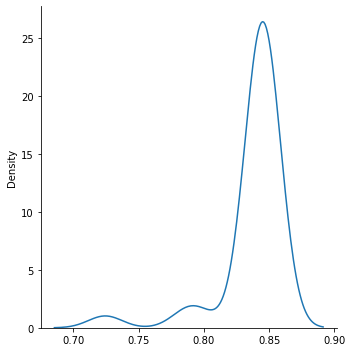

In [10]:
sns.displot(results_linear_poly2_r2, kind='kde');

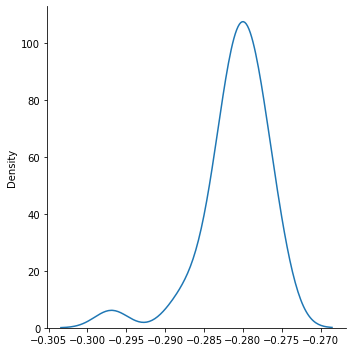

In [11]:
sns.displot(results_linear_poly2_mae, kind='kde');

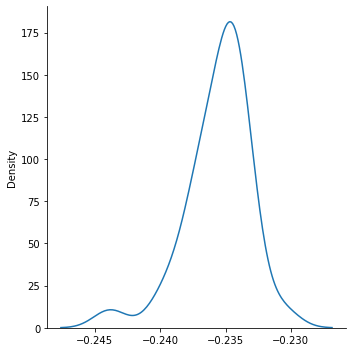

In [13]:
sns.displot(results_forest_mae, kind='kde');

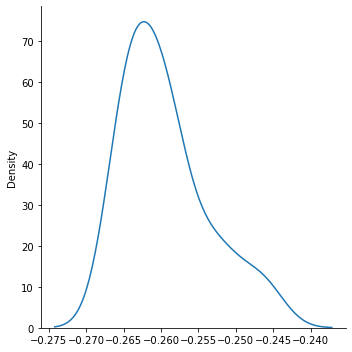

In [14]:
sns.displot(results_neural_mae, kind='kde');

We can see that even these results are still close to a normal distribution. Therefore, we now do the ANOVA test to verify if the results we obtained are statistically the same (null hypothesis) or if they are statistically distinct (alternative hypothesis).

In [16]:
print(f_oneway(results_linear_r2, results_linear_poly2_r2, results_tree_r2, results_forest_r2, results_svm_r2, results_neural_r2))

F_onewayResult(statistic=430.15195016172123, pvalue=6.276865461436745e-96)


In [17]:
print(f_oneway(results_linear_mae, results_linear_poly2_mae, results_tree_mae, results_forest_mae, results_svm_mae, results_neural_mae))

F_onewayResult(statistic=3695.4260263104375, pvalue=1.4632941258000453e-174)


Since the p-value is smaller than 0.05, we reject the null hypothesis, that is, the results are statistically distinct.

Now we do the Tukey test to compare each set of results with each other one and verify if they are statistically the same (null hypothesis) or not (alternative hypothesis).

In [21]:
results_algorithms_r2 = {'r2': np.concatenate([results_linear_r2, results_linear_poly2_r2, results_tree_r2, results_forest_r2, results_svm_r2, results_neural_r2]),
                      'algorithm': ['linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 
                                    'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 
                                    'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree',
                                    'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',  
                                    'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 
                                    'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural']}
results_df_r2 = pd.DataFrame(results_algorithms_r2)
results_df_r2

,r2,algorithm
0,0.788786,linear
1,0.786873,linear
2,0.779988,linear
3,0.787546,linear
4,0.790797,linear
...,...,...
175,0.868559,neural
176,0.871394,neural
177,0.870325,neural
178,0.854208,neural


In [22]:
results_algorithms_mae = {'mae': np.concatenate([results_linear_mae, results_linear_poly2_mae, results_tree_mae, results_forest_mae, results_svm_mae, results_neural_mae]),
                      'algorithm': ['linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 'linear', 
                                    'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 'polynomial', 
                                    'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree',
                                    'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',  
                                    'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 
                                    'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural', 'neural']}
results_df_mae = pd.DataFrame(results_algorithms_mae)
results_df_mae

,mae,algorithm
0,-0.341563,linear
1,-0.340496,linear
2,-0.341095,linear
3,-0.340743,linear
4,-0.340255,linear
...,...,...
175,-0.265651,neural
176,-0.260646,neural
177,-0.264969,neural
178,-0.258493,neural


In [23]:
compare_algorithms_r2 = MultiComparison(results_df_r2['r2'], results_df_r2['algorithm'])
print(compare_algorithms_r2.tukeyhsd())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    forest     linear  -0.0924   -0.0 -0.1009 -0.0839   True
    forest     neural   -0.011 0.0033 -0.0196 -0.0025   True
    forest polynomial  -0.0414   -0.0 -0.0499 -0.0329   True
    forest        svm   0.0152    0.0  0.0067  0.0237   True
    forest       tree  -0.0766   -0.0 -0.0851 -0.0681   True
    linear     neural   0.0813   -0.0  0.0728  0.0898   True
    linear polynomial    0.051   -0.0  0.0425  0.0595   True
    linear        svm   0.1076   -0.0  0.0991  0.1161   True
    linear       tree   0.0158    0.0  0.0073  0.0243   True
    neural polynomial  -0.0303   -0.0 -0.0389 -0.0218   True
    neural        svm   0.0262    0.0  0.0177  0.0347   True
    neural       tree  -0.0655   -0.0  -0.074  -0.057   True
polynomial        svm   0.0566   -0.0  0.0481  0.0651   True
polynomial       tree  -

In [25]:
compare_algorithms_mae = MultiComparison(results_df_mae['mae'], results_df_mae['algorithm'])
print(compare_algorithms_mae.tukeyhsd())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj  lower   upper  reject
-----------------------------------------------------------
    forest     linear  -0.1054  -0.0 -0.1084 -0.1024   True
    forest     neural  -0.0239  -0.0 -0.0269 -0.0209   True
    forest polynomial  -0.0453  -0.0 -0.0483 -0.0423   True
    forest        svm   0.0121  -0.0  0.0091  0.0151   True
    forest       tree  -0.0738  -0.0 -0.0768 -0.0708   True
    linear     neural   0.0815  -0.0  0.0785  0.0845   True
    linear polynomial   0.0601  -0.0  0.0571  0.0631   True
    linear        svm   0.1174  -0.0  0.1144  0.1204   True
    linear       tree   0.0315  -0.0  0.0285  0.0345   True
    neural polynomial  -0.0215  -0.0 -0.0245 -0.0185   True
    neural        svm   0.0359  -0.0  0.0329  0.0389   True
    neural       tree    -0.05  -0.0  -0.053  -0.047   True
polynomial        svm   0.0574  -0.0  0.0544  0.0604   True
polynomial       tree  -0.0285  -0.0 -0.

Since the p-values are all smaller than 0.05, we conclude that the results of each algorithm are statistically distinct from the results of the others. Therefore, the best algorithm for this problem is the support vector regressor.